In [1]:
import pandas as pd

daily_players = pd.read_csv("decentraland_daily_visitors.csv")
daily_price = pd.read_csv("MANA-USD.csv")

daily_price["Date"] = daily_price["Date"].astype("str")
daily_players["Active Day"] = daily_players["Active Day"].astype("str")

daily_price['date'] = daily_price["Date"]
daily_players['date'] = daily_players["Active Day"]

daily_price.drop("Date", axis=1, inplace=True)
daily_players.drop("Active Day", axis=1, inplace=True)

daily_price = daily_price.tail(1200)
daily_players = daily_players.tail(1200)

daily_price.reset_index(inplace=True, drop=True)
daily_players.reset_index(inplace=True, drop=True)


In [2]:
# daily_players.tail(369).to_csv("decentraland_dau_sample.csv", index=False)
# daily_price.tail(369).to_csv("mana_daily_price_sample.csv", index=False)    

In [3]:
daily_players

,Active Users,date
0,3,2019-06-24
1,7,2019-06-25
2,12,2019-06-26
3,14,2019-06-27
4,18,2019-06-28
...,...,...
1195,4169,2022-10-01
1196,3998,2022-10-02
1197,4655,2022-10-03
1198,4915,2022-10-04


In [4]:
daily_price

,Open,High,Low,Close,Adj Close,Volume,date
0,0.053927,0.056241,0.053012,0.054048,0.054048,10111803,2019-06-24
1,0.054071,0.055577,0.051697,0.052092,0.052092,12051718,2019-06-25
2,0.052092,0.054534,0.048620,0.049772,0.049772,14542780,2019-06-26
3,0.049887,0.050541,0.043689,0.045408,0.045408,11212750,2019-06-27
4,0.045457,0.047457,0.043778,0.046704,0.046704,9325384,2019-06-28
...,...,...,...,...,...,...,...
1195,0.698128,0.702553,0.691854,0.693072,0.693072,61036195,2022-10-01
1196,0.693102,0.696785,0.681832,0.682872,0.682872,70828324,2022-10-02
1197,0.682869,0.697688,0.677542,0.696955,0.696955,100801265,2022-10-03
1198,0.696968,0.707431,0.693442,0.704043,0.704043,100628912,2022-10-04


In [5]:
combined_df = pd.concat([daily_players["Active Users"], daily_price], axis=1)
combined_df

,Active Users,Open,High,Low,Close,Adj Close,Volume,date
0,3,0.053927,0.056241,0.053012,0.054048,0.054048,10111803,2019-06-24
1,7,0.054071,0.055577,0.051697,0.052092,0.052092,12051718,2019-06-25
2,12,0.052092,0.054534,0.048620,0.049772,0.049772,14542780,2019-06-26
3,14,0.049887,0.050541,0.043689,0.045408,0.045408,11212750,2019-06-27
4,18,0.045457,0.047457,0.043778,0.046704,0.046704,9325384,2019-06-28
...,...,...,...,...,...,...,...,...
1195,4169,0.698128,0.702553,0.691854,0.693072,0.693072,61036195,2022-10-01
1196,3998,0.693102,0.696785,0.681832,0.682872,0.682872,70828324,2022-10-02
1197,4655,0.682869,0.697688,0.677542,0.696955,0.696955,100801265,2022-10-03
1198,4915,0.696968,0.707431,0.693442,0.704043,0.704043,100628912,2022-10-04


In [6]:
combined_df.corr() # method="kendall"

/var/folders/nm/87s9mllj619_1wsgzbxn_fh40000gn/T/ipykernel_7114/1659230550.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined_df.corr() # method="kendall"


,Active Users,Open,High,Low,Close,Adj Close,Volume
Active Users,1.000000,0.937548,0.930664,0.940182,0.934805,0.934805,0.367183
Open,0.937548,1.000000,0.993889,0.997361,0.994437,0.994437,0.430179
High,0.930664,0.993889,1.000000,0.991845,0.997556,0.997556,0.512476
Low,0.940182,0.997361,0.991845,1.000000,0.995230,0.995230,0.414578
Close,0.934805,0.994437,0.997556,0.995230,1.000000,1.000000,0.478589
Adj Close,0.934805,0.994437,0.997556,0.995230,1.000000,1.000000,0.478589
Volume,0.367183,0.430179,0.512476,0.414578,0.478589,0.478589,1.000000


/var/folders/nm/87s9mllj619_1wsgzbxn_fh40000gn/T/ipykernel_7114/3670650042.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = combined_df.corr()


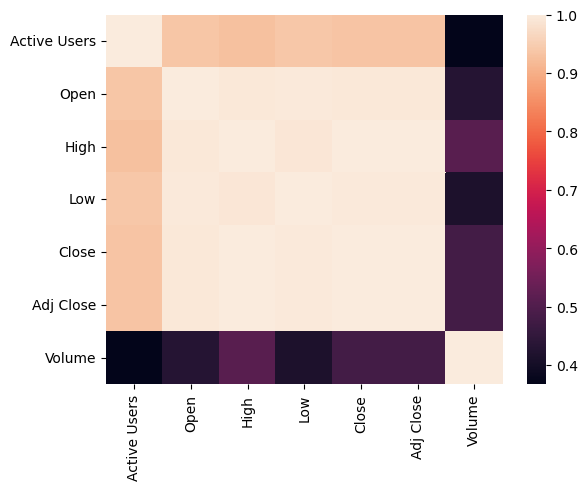

In [7]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix on the numeric columns
corr = combined_df.corr()

# plot the heatmap
sns.heatmap(corr);

In [8]:
combined_df['users'] = combined_df["Active Users"]

combined_df

,Active Users,Open,High,Low,Close,Adj Close,Volume,date,users
0,3,0.053927,0.056241,0.053012,0.054048,0.054048,10111803,2019-06-24,3
1,7,0.054071,0.055577,0.051697,0.052092,0.052092,12051718,2019-06-25,7
2,12,0.052092,0.054534,0.048620,0.049772,0.049772,14542780,2019-06-26,12
3,14,0.049887,0.050541,0.043689,0.045408,0.045408,11212750,2019-06-27,14
4,18,0.045457,0.047457,0.043778,0.046704,0.046704,9325384,2019-06-28,18
...,...,...,...,...,...,...,...,...,...
1195,4169,0.698128,0.702553,0.691854,0.693072,0.693072,61036195,2022-10-01,4169
1196,3998,0.693102,0.696785,0.681832,0.682872,0.682872,70828324,2022-10-02,3998
1197,4655,0.682869,0.697688,0.677542,0.696955,0.696955,100801265,2022-10-03,4655
1198,4915,0.696968,0.707431,0.693442,0.704043,0.704043,100628912,2022-10-04,4915


In [22]:
combined_df[["Close", "date"]]

,Close,date
0,0.054048,2019-06-24
1,0.052092,2019-06-25
2,0.049772,2019-06-26
3,0.045408,2019-06-27
4,0.046704,2019-06-28
...,...,...
1195,0.693072,2022-10-01
1196,0.682872,2022-10-02
1197,0.696955,2022-10-03
1198,0.704043,2022-10-04


In [23]:
combined_df[['users', "date"]].shift()

,users,date
0,NaN,None
1,3.0,2019-06-24
2,7.0,2019-06-25
3,12.0,2019-06-26
4,14.0,2019-06-27
...,...,...
1195,5006.0,2022-09-30
1196,4169.0,2022-10-01
1197,3998.0,2022-10-02
1198,4655.0,2022-10-03


In [61]:
combined_df

,Active Users,Open,High,Low,Close,Adj Close,Volume,date,users
0,3,0.053927,0.056241,0.053012,0.054048,0.054048,10111803,2019-06-24,3
1,7,0.054071,0.055577,0.051697,0.052092,0.052092,12051718,2019-06-25,7
2,12,0.052092,0.054534,0.048620,0.049772,0.049772,14542780,2019-06-26,12
3,14,0.049887,0.050541,0.043689,0.045408,0.045408,11212750,2019-06-27,14
4,18,0.045457,0.047457,0.043778,0.046704,0.046704,9325384,2019-06-28,18
...,...,...,...,...,...,...,...,...,...
1195,4169,0.698128,0.702553,0.691854,0.693072,0.693072,61036195,2022-10-01,4169
1196,3998,0.693102,0.696785,0.681832,0.682872,0.682872,70828324,2022-10-02,3998
1197,4655,0.682869,0.697688,0.677542,0.696955,0.696955,100801265,2022-10-03,4655
1198,4915,0.696968,0.707431,0.693442,0.704043,0.704043,100628912,2022-10-04,4915


In [62]:
cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

one_day_after_df = pd.concat([combined_df[["date", 'users']].shift(), combined_df[cols]], axis=1)
# remove null row
one_day_after_df.dropna(inplace=True)

# rename Close to close
one_day_after_df.rename({"Close": 'close'}, inplace=True, axis=1)

one_day_after_df

,date,users,Open,High,Low,close,Adj Close,Volume
1,2019-06-24,3.0,0.054071,0.055577,0.051697,0.052092,0.052092,12051718
2,2019-06-25,7.0,0.052092,0.054534,0.048620,0.049772,0.049772,14542780
3,2019-06-26,12.0,0.049887,0.050541,0.043689,0.045408,0.045408,11212750
4,2019-06-27,14.0,0.045457,0.047457,0.043778,0.046704,0.046704,9325384
5,2019-06-28,18.0,0.046736,0.051630,0.045245,0.050319,0.050319,11460416
...,...,...,...,...,...,...,...,...
1195,2022-09-30,5006.0,0.698128,0.702553,0.691854,0.693072,0.693072,61036195
1196,2022-10-01,4169.0,0.693102,0.696785,0.681832,0.682872,0.682872,70828324
1197,2022-10-02,3998.0,0.682869,0.697688,0.677542,0.696955,0.696955,100801265
1198,2022-10-03,4655.0,0.696968,0.707431,0.693442,0.704043,0.704043,100628912


In [63]:
one_day_after_df.corr() # method="spearman"

/var/folders/nm/87s9mllj619_1wsgzbxn_fh40000gn/T/ipykernel_7114/2409256991.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  one_day_after_df.corr() # method="spearman"


,users,Open,High,Low,close,Adj Close,Volume
users,1.000000,0.934270,0.923584,0.936684,0.929222,0.929222,0.335907
Open,0.934270,1.000000,0.993887,0.997360,0.994435,0.994435,0.430125
High,0.923584,0.993887,1.000000,0.991841,0.997555,0.997555,0.512441
Low,0.936684,0.997360,0.991841,1.000000,0.995228,0.995228,0.414521
close,0.929222,0.994435,0.997555,0.995228,1.000000,1.000000,0.478547
Adj Close,0.929222,0.994435,0.997555,0.995228,1.000000,1.000000,0.478547
Volume,0.335907,0.430125,0.512441,0.414521,0.478547,0.478547,1.000000


/var/folders/nm/87s9mllj619_1wsgzbxn_fh40000gn/T/ipykernel_7114/504677040.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(one_day_after_df.corr()); # method="spearman"


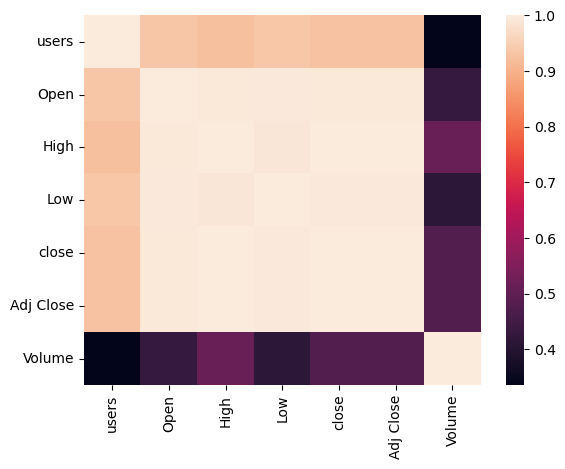

In [64]:
sns.heatmap(one_day_after_df.corr()); # method="spearman"

In [67]:
cols = ["Open", "High", "Low", "Close", "Adj Close"]

two_day_after_df = pd.concat([combined_df[["date", 'users']].shift(periods=2), combined_df[cols]], axis=1)
# remove null row
two_day_after_df.dropna(inplace=True)

# rename Close to close
two_day_after_df.rename({"Close": 'close'}, inplace=True, axis=1)

two_day_after_df.corr()

/var/folders/nm/87s9mllj619_1wsgzbxn_fh40000gn/T/ipykernel_7114/781869527.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  two_day_after_df.corr()


,users,Open,High,Low,close,Adj Close
users,1.000000,0.928252,0.915286,0.931509,0.922993,0.922993
Open,0.928252,1.000000,0.993884,0.997359,0.994433,0.994433
High,0.915286,0.993884,1.000000,0.991838,0.997554,0.997554
Low,0.931509,0.997359,0.991838,1.000000,0.995226,0.995226
close,0.922993,0.994433,0.997554,0.995226,1.000000,1.000000
Adj Close,0.922993,0.994433,0.997554,0.995226,1.000000,1.000000


/var/folders/nm/87s9mllj619_1wsgzbxn_fh40000gn/T/ipykernel_7114/4148680788.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(two_day_after_df.corr());


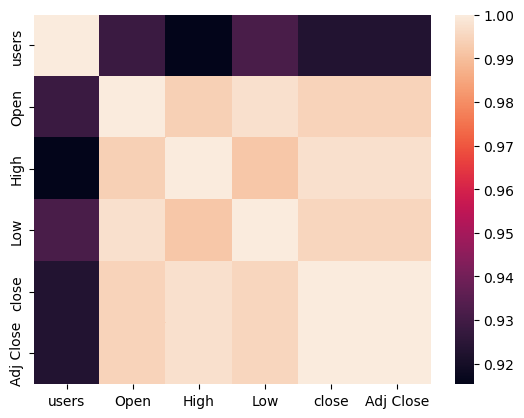

In [68]:
sns.heatmap(two_day_after_df.corr());